<a href="https://colab.research.google.com/github/manaswipatil11/iris-MidAnalysis/blob/main/irisMQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

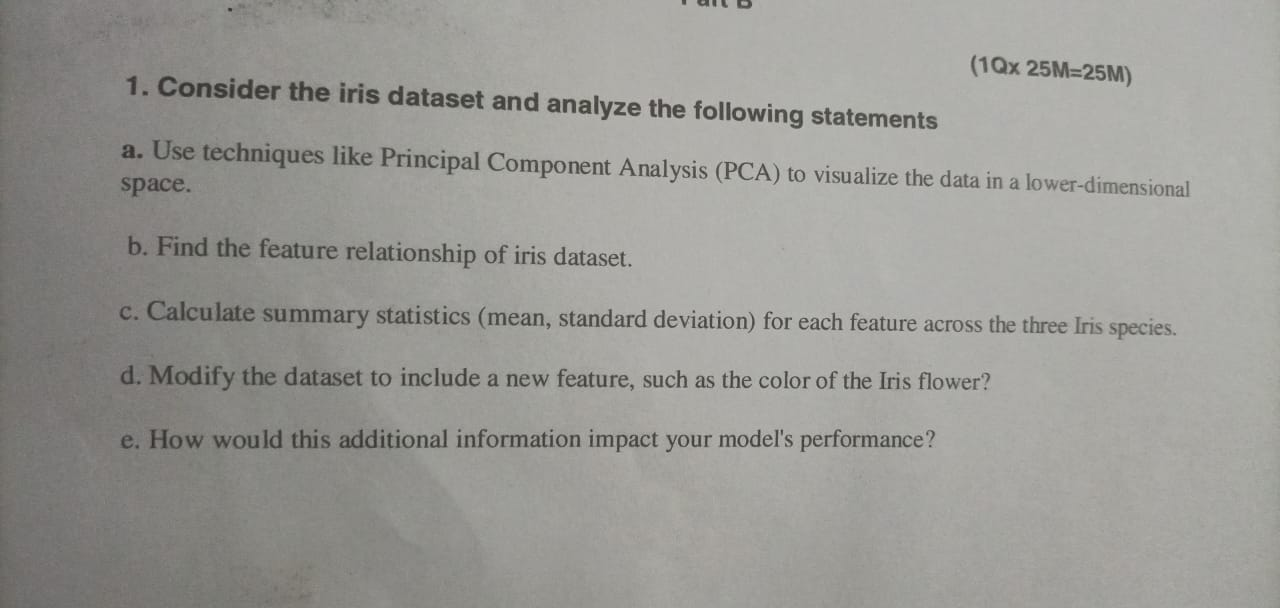

# 1). PCA

# Importing the dataset

In [ ]:
import pandas as pd

df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# EDA

In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Seperating the independent and dependent variables

In [ ]:
x = df.drop('species', axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = df['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Scaling the numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

# Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x = pca.fit_transform(x)

In [ ]:
PCAdata = pd.DataFrame(x, columns=['PC1','PC2'])
PCAdata

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [ ]:
PCAdata['species'] = y
PCAdata

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


# PCA Visualization

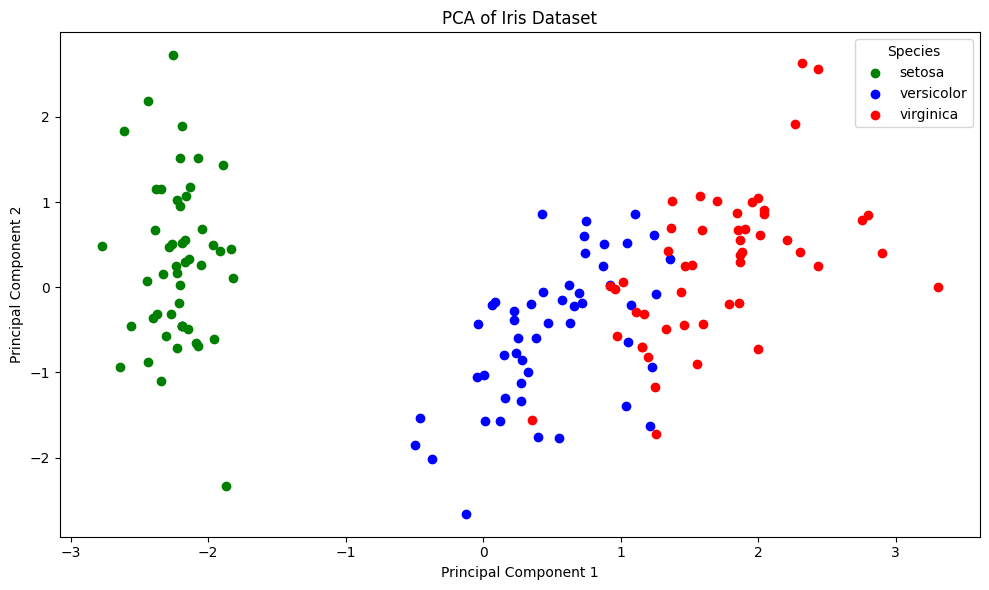

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
species = PCAdata['species'].unique()
colors = ['green', 'blue', 'red']
for i, spec in enumerate(species):
    subset = PCAdata[PCAdata['species'] == spec]
    plt.scatter(subset['PC1'], subset['PC2'], label=spec, color=colors[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

# 2). Feature relationship of Iris dataset

To understand the relationship between the features, we may use pairplot and heatmap. Both these are visual charts built on the correlation values between different features.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


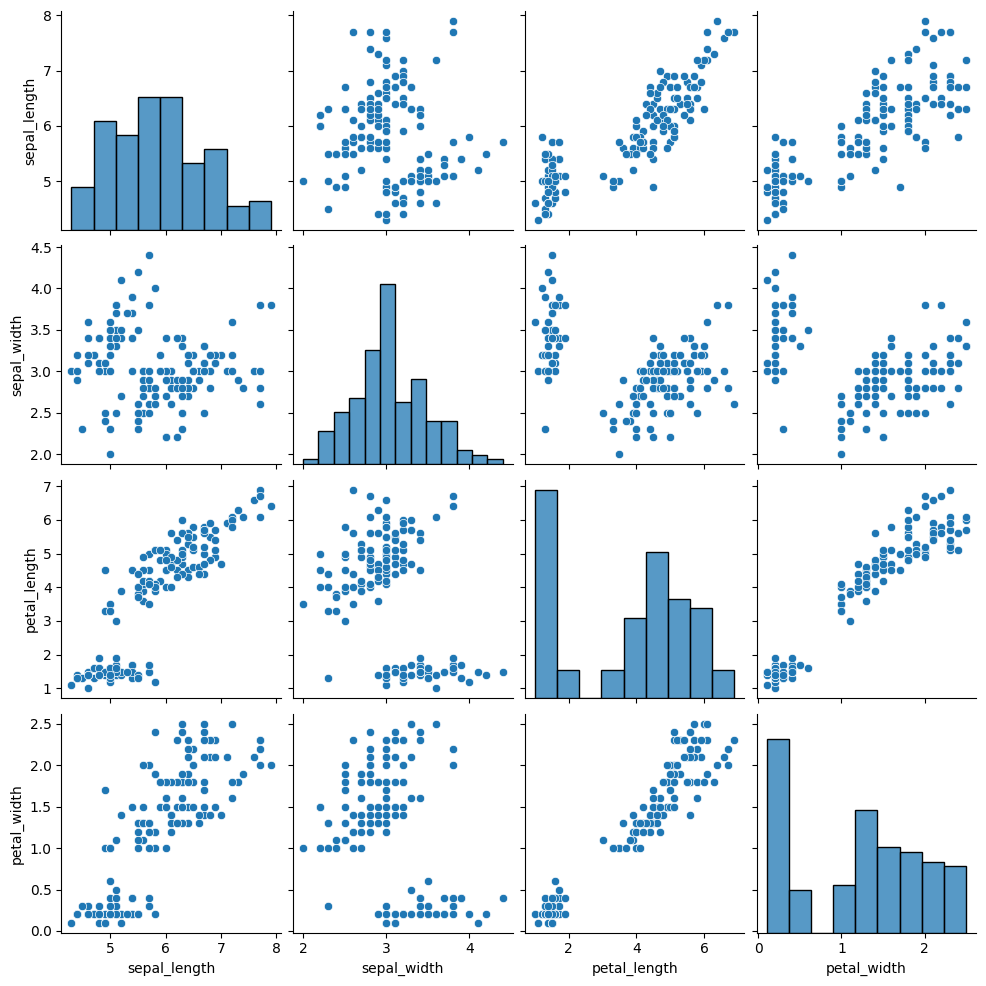

In [ ]:
import seaborn as sns

sns.pairplot(df)

<Axes: >

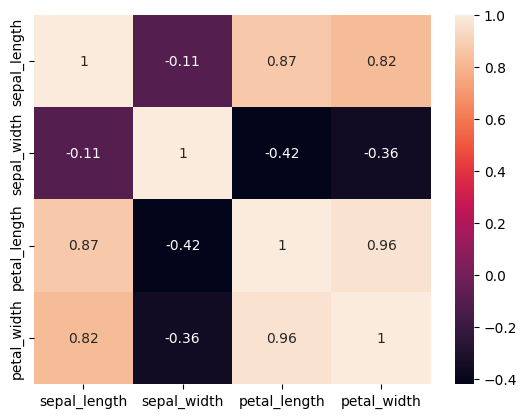

In [ ]:
num_cols = df.drop('species', axis=1)

sns.heatmap(num_cols.corr(), annot=True)

# Conclusions:
* petal_length and petal_width seem to have strong positive correlation.
* And also (sepal_length and petal_width) and (sepal_length and petal_length) have strong positive correlation.
* We may also consider, sepal_length and sepal width have negative correlation.

# 3). Statistical Summary

describe() function returns the entire statistical summary of the data

We can also use mean() and std() to calculate the statistical values seperately.

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
SLmean = df['sepal_length'].mean()
SLstd = df['sepal_length'].std()
print(f"Mean of Sepal Length feature: {SLmean}\nStandard Deviation of Sepal Length feature: {SLstd}")

Mean of Sepal Length feature: 5.843333333333334
Standard Deviation of Sepal Length feature: 0.828066127977863


# 4). Adding a new column 'color' to the existing data

In [ ]:
import numpy as np
colors = ['red', 'blue', 'yellow']
np.random.seed(0)
df['color'] = np.random.choice(colors, size=len(df))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,color
0,5.1,3.5,1.4,0.2,setosa,red
1,4.9,3.0,1.4,0.2,setosa,blue
2,4.7,3.2,1.3,0.2,setosa,red
3,4.6,3.1,1.5,0.2,setosa,blue
4,5.0,3.6,1.4,0.2,setosa,blue


# 5). Analysing if any additional impact on the model

If the 'color' feature is informative and has a strong correlation with the target variable (species), it can improve the model's predictive power. For example, if certain colors are more common for specific species of iris flowers, the model can learn this relationship and make better predictions.

Since, the color feature has categorical data. It is necessary to encode this data into numeric values.

In [ ]:
#Label Encoding of color column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['color'] = le.fit_transform(df['color'])
df

,sepal_length,sepal_width,petal_length,petal_width,species,color
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [ ]:
x2 = df.drop('species', axis=1)
x2

,sepal_length,sepal_width,petal_length,petal_width,color
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


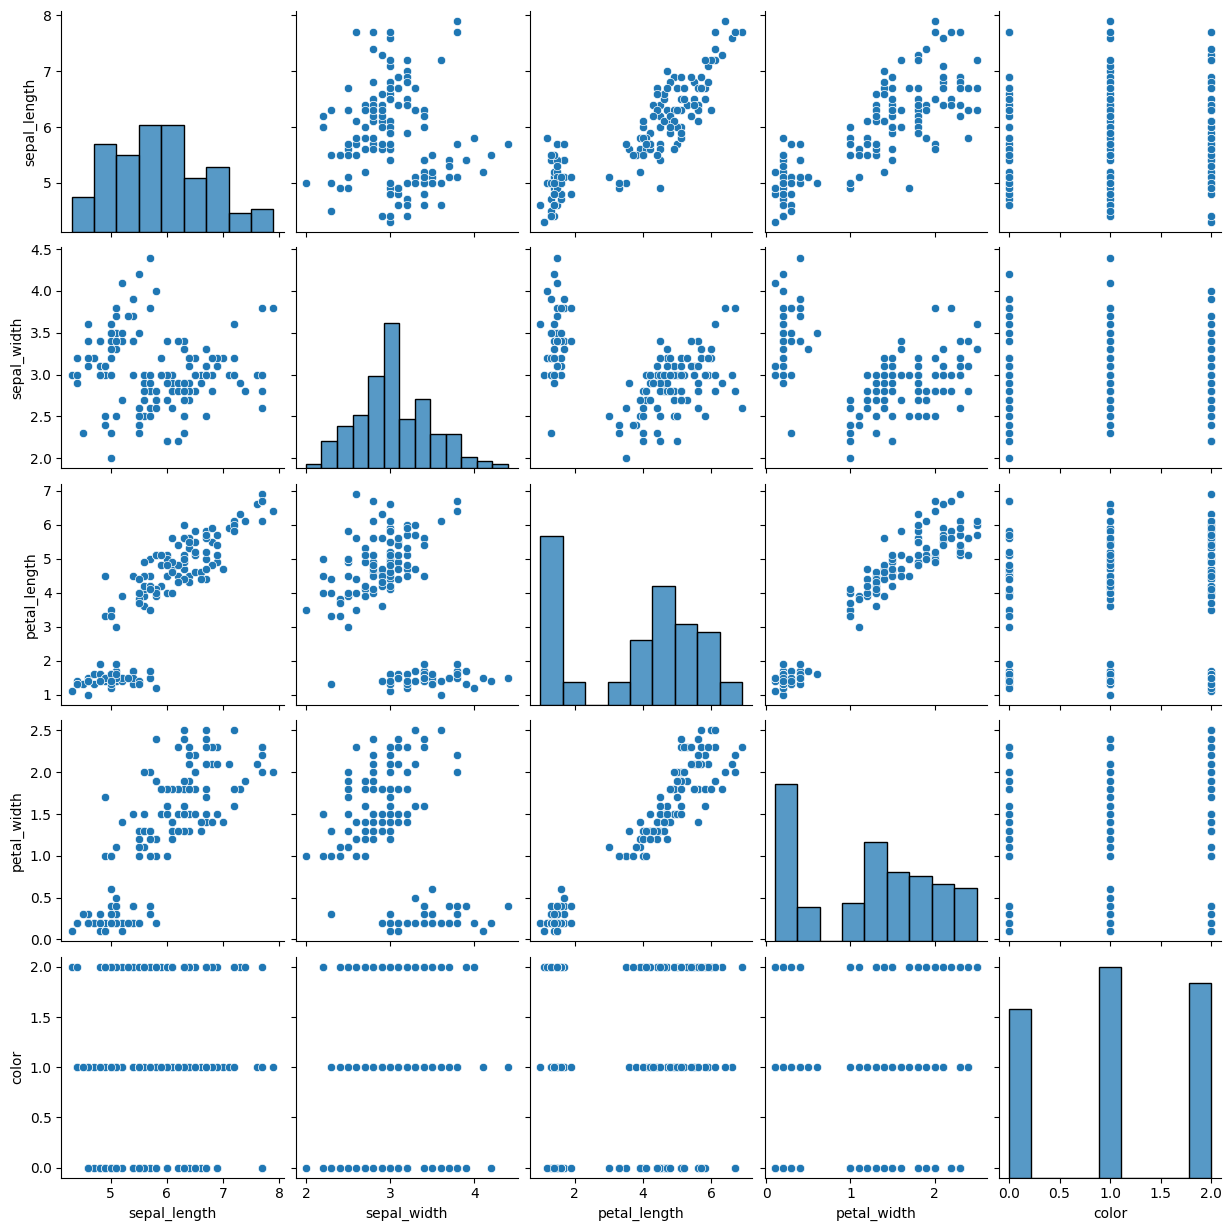

In [ ]:
sns.pairplot(x2)

<Axes: >

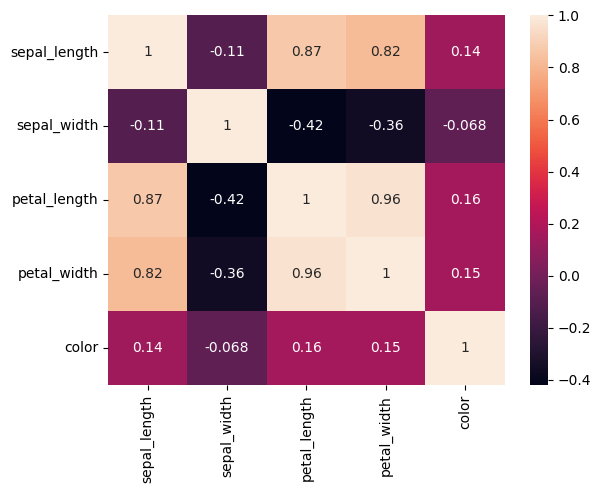

In [ ]:
sns.heatmap(x2.corr(), annot=True)

We can see some correlation between our new feature 'color' and the other features. So, the color feature to some extent influences the predictive power of our model.

* But anyway, introducing the new column, if it has some noise data points, hampers the efficiency of the model.
* One should also consider, if adding a new column is resulting in Overfitting or Underfitting.

# Proper Feature Engineering techniques shall help us build the an efficient predictive model.